In [1]:
# All
import pandas as pd
import numpy as np

# matplotlib
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

# plotly
import plotly.io as pio
import plotly.express as px

# seaborn
import seaborn as sns

# Set templates
pio.templates.default = "seaborn"
plt.style.use("seaborn")
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

stocks = ["AMZN", "GOOGL", "IBM", "JPM"]
df = df.loc[
    (df.Name.isin(stocks)) & (pd.to_datetime(df.Date).dt.year == 2016),
    ["Date", "Name", "Close", "Open"],
]
df["Return"] = (df["Close"] - df["Open"]) / df["Open"]
df["Date"] = pd.to_datetime(df.Date)

In [2]:
df

,Date,Name,Close,Open,Return
41775,2016-01-04,IBM,135.95,135.60,0.002581
41776,2016-01-05,IBM,135.85,136.76,-0.006654
41777,2016-01-06,IBM,135.17,134.38,0.005879
41778,2016-01-07,IBM,132.86,133.70,-0.006283
41779,2016-01-08,IBM,131.63,133.18,-0.011638
41780,2016-01-11,IBM,133.23,131.81,0.010773
41781,2016-01-12,IBM,132.90,133.65,-0.005612
41782,2016-01-13,IBM,131.17,133.50,-0.017453
41783,2016-01-14,IBM,132.91,131.93,0.007428
41784,2016-01-15,IBM,130.03,130.01,0.000154


In [3]:
df_wide = df.pivot(index="Date", columns="Name", values="Return")

In [4]:
df_wide.head(10)

Name,AMZN,GOOGL,IBM,JPM
Date,,,,
2016-01-04,-0.029408,-0.003621,0.002581,-0.005160
2016-01-05,-0.020205,-0.003363,-0.006654,0.000471
2016-01-06,0.017122,0.011941,0.005879,0.001435
2016-01-07,-0.022290,-0.007354,-0.006283,-0.019362
2016-01-08,-0.020350,-0.022586,-0.011638,-0.036152
2016-01-11,0.008588,0.001530,0.010773,0.000000
2016-01-12,-0.011771,0.006196,-0.005612,-0.008242
2016-01-13,-0.062927,-0.039728,-0.017453,-0.035654
2016-01-14,0.021973,0.009594,0.007428,0.000688


Text(0, 0.5, 'Daily returns')

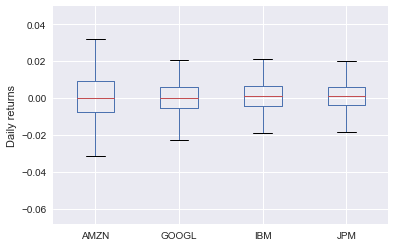

In [5]:
ax = df_wide.boxplot(column=["AMZN", "GOOGL", "IBM", "JPM"])

ax.set_ylabel("Daily returns")

In [11]:
import plotly.express as px

df = pd.DataFrame(dict(x1=[1,2,3], x2=[4,8,12],x3=[1,5,10]))
#df = df.melt(value_vars=['x1','x2','x3'])
#fig = px.box(df, x='variable', y='value', color='variable')
#fig.show()

In [12]:
df

,x1,x2,x3
0,1,4,1
1,2,8,5
2,3,12,10


In [13]:
df = df.melt(value_vars=['x1','x2','x3'])

In [14]:
df

,variable,value
0,x1,1
1,x1,2
2,x1,3
3,x2,4
4,x2,8
5,x2,12
6,x3,1
7,x3,5
8,x3,10


In [ ]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline
# Set file paths
hd_data = Path("../Resources/HD.csv")
jnj_data = Path("../Resources/JNJ.csv")
intc_data = Path("../Resources/INTC.csv")
amd_data = Path("../Resources/AMD.csv")
mu_data = Path("../Resources/MU.csv")
nvda_data = Path("../Resources/NVDA.csv")
tsm_data = Path("../Resources/TSM.csv")

# Read the individual CSV datasets
hd = pd.read_csv(hd_data, index_col="date")
jnj = pd.read_csv(jnj_data, index_col="date")
intc = pd.read_csv(intc_data, index_col="date")
amd = pd.read_csv(amd_data, index_col="date")
mu = pd.read_csv(mu_data, index_col="date")
nvda = pd.read_csv(nvda_data, index_col="date")
tsm = pd.read_csv(tsm_data, index_col="date")

intc.head()